### G2M insight for Cab Investment Firm


##### Importing libraries and loading dataset files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cab = pd.read_csv("/content/drive/MyDrive/DataSets-main/Cab_Data.csv")
city = pd.read_csv("/content/drive/MyDrive/DataSets-main/City.csv")
customer = pd.read_csv("/content/drive/MyDrive/DataSets-main/Customer_ID.csv")
transaction = pd.read_csv("/content/drive/MyDrive/DataSets-main/Transaction_ID.csv")

##### Understand and Analyse data

In [ ]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [ ]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
from datetime import datetime

min_date = cab['Date of Travel'].min()
max_date = cab['Date of Travel'].max()

trans_min = datetime.fromordinal(datetime(1900, 1, 28).toordinal() + min_date).strftime("%d-%m-%Y")
trans_max = datetime.fromordinal(datetime(1900, 1, 28).toordinal() + max_date).strftime("%d-%m-%Y")

print(trans_min)
print(trans_max)

31-01-2016
29-01-2019


In [ ]:
# Data of Travel should be changed to a datetime data type
def date_(date):
    convert = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + date - 2).strftime("%d-%m-%Y")
    return datetime.strptime(convert, "%d-%m-%Y")

cab['Date of Travel'] = cab['Date of Travel'].apply(lambda x: date_(x))

In [ ]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
cab.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [ ]:
cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [ ]:
cab['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [ ]:
cab.shape

(359392, 7)

In [ ]:
city = pd.read_csv("/content/drive/MyDrive/DataSets-main/City.csv")

In [ ]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [ ]:
# change population and users col dtypes to int
city['Population'] = [pop.replace(',', '') for pop in city['Population']]
city['Population'] = city['Population'].astype(int)
city['Users'] = [user.replace(',', '') for user in city['Users']]
city['Users'] = city['Users'].astype(int)


In [ ]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [ ]:
city.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [ ]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [ ]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


Merge All DataFrames

In [ ]:
cab.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [ ]:
city.head(2)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468


In [ ]:
customer.head(2)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


In [ ]:
transaction.head(2)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card


In [ ]:
# merge df's
df = cab.merge(transaction, on='Transaction ID').merge(customer, on='Customer ID').merge(city, on='City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [ ]:
df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                     int64
Users                          int64
dtype: object

In [ ]:
# adding a profit column to the dataframe for further analysis
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772


In [ ]:
df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit                0
dtype: int64

In [ ]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000


<Axes: >

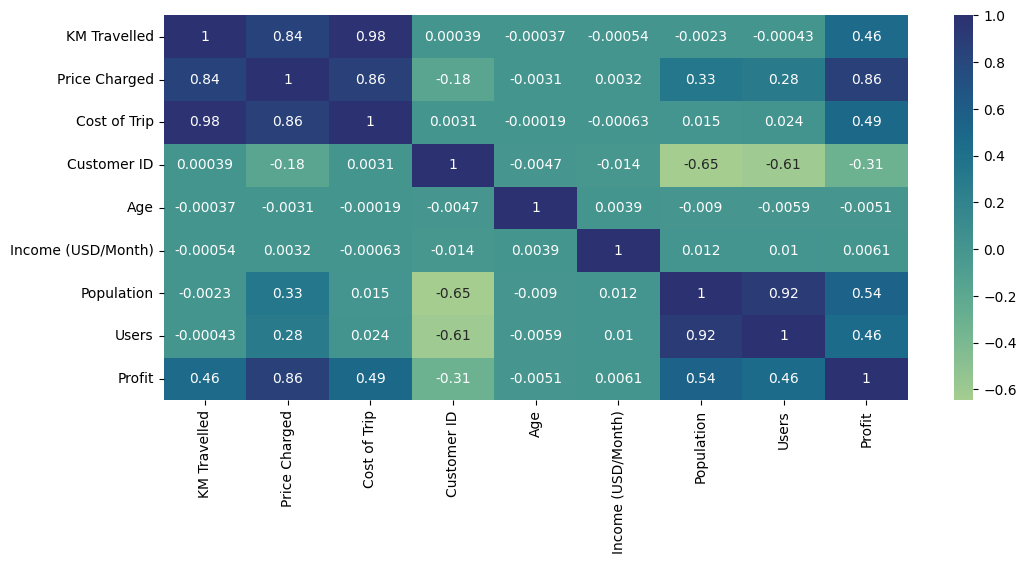

In [ ]:
# visualize the dataframe, only the numerical cols
num_data = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Profit']
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df[num_data].corr(), annot=True, cmap="crest", ax=ax)


<Figure size 800x400 with 0 Axes>

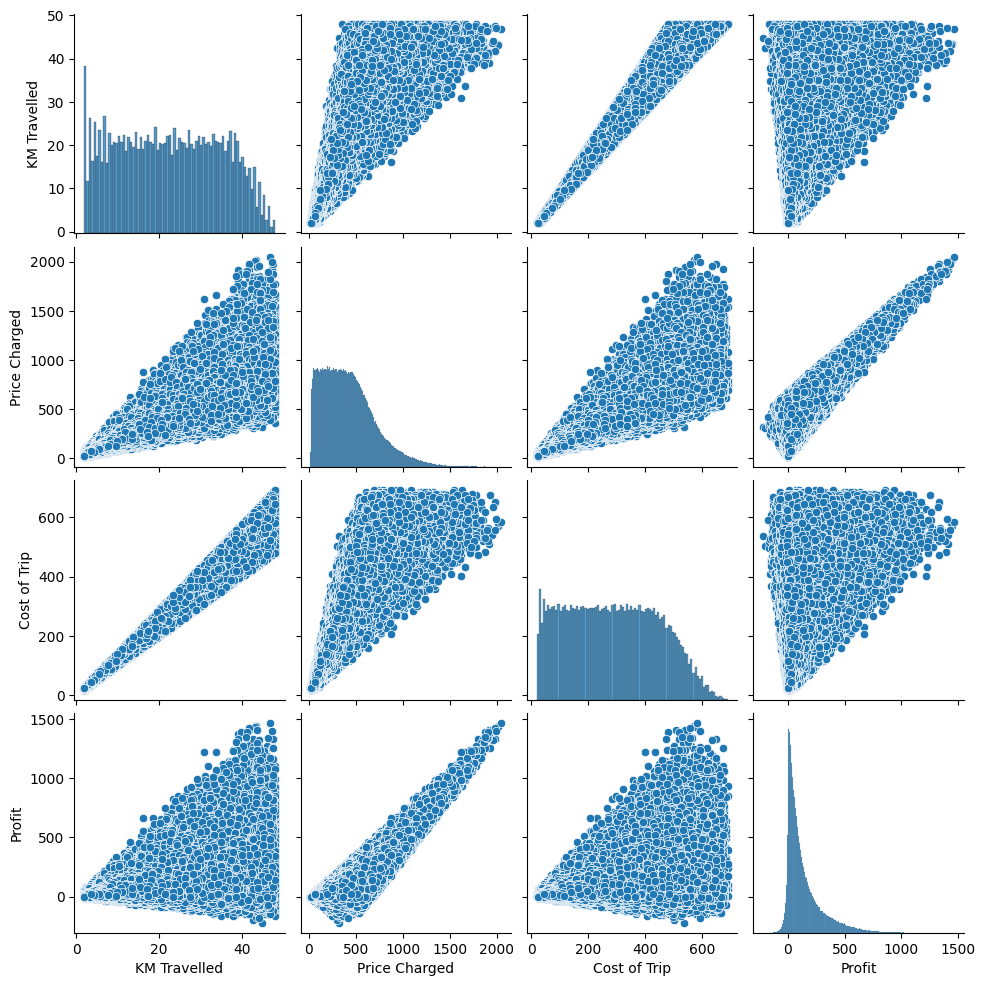

In [ ]:
plt.figure(figsize=(8,4))
data = df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']]
sns.pairplot(data=data)
plt.show()

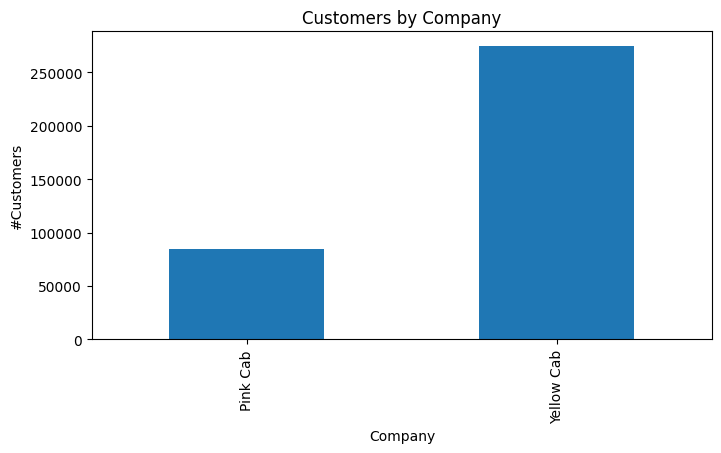

In [ ]:
plt.figure(figsize=(8,4))
df['Company'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('#Customers')
plt.title('Customers by Company')
plt.show()

###### **Conclusion**: The yellow cab company has the most users compared to the pink cab company

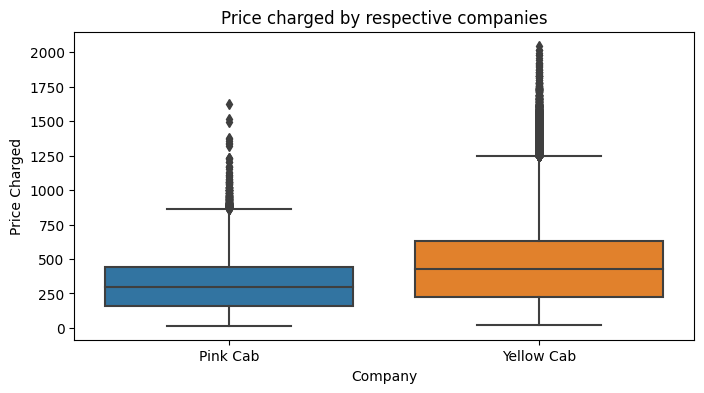

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Company'], y=df['Price Charged'])
plt.title('Price charged by respective companies')
plt.plot();

###### **Conclusion**: yellow cab company charges higher to their users

In [ ]:
# profits of each companies over the years
df['year'] = df['Date of Travel'].dt.year
pink_cab_profits = df[df.Company=='Pink Cab'].groupby('year').Profit.mean()
yellow_cab_profits = df[df.Company=='Yellow Cab'].groupby('year').Profit.mean()

In [ ]:
print("Pink cab profits ", pink_cab_profits)
print("Yellow cab profits ", yellow_cab_profits)

Pink cab profits  year
2016    63.864163
2017    66.459466
2018    56.538648
2019    74.704456
Name: Profit, dtype: float64
Yellow cab profits  year
2016    171.379921
2017    169.083129
2018    145.837970
2019    134.707558
Name: Profit, dtype: float64


<Axes: xlabel='year'>

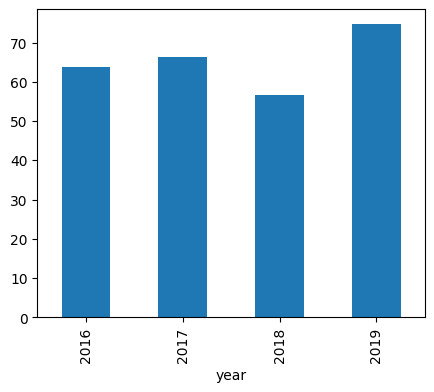

In [ ]:
pink_cab_profits.plot.bar(figsize=(5,4))

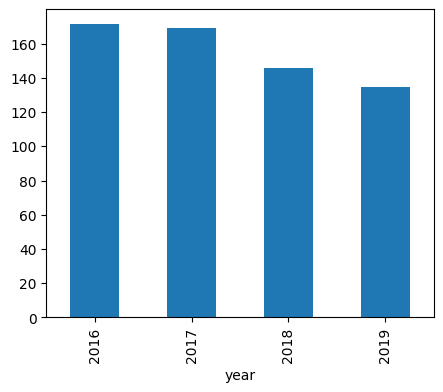

In [ ]:
yellow_cab_profits.plot.bar(figsize=(5,4));

###### **Conclusion**: Yellow cab profits are slightly in a decline but overall they have higher profits even during this decline period

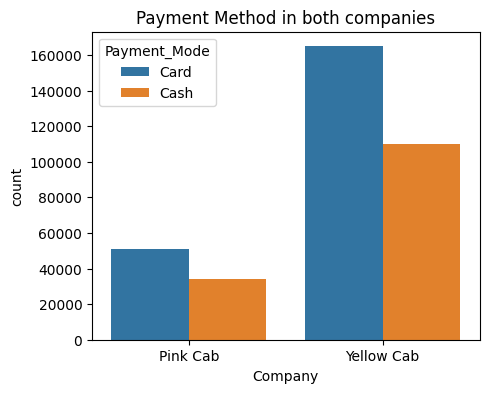

In [ ]:
# payment method
plt.figure(figsize=(5,4))
sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title("Payment Method in both companies")
plt.show();

###### **Conclusion**: Most of the users availing bothe the cab services prefer paying through card

In [ ]:
gender = df.groupby(['Company', 'Gender'])
gender_uni = gender['Customer ID'].nunique()
gender_uni

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64

<Figure size 1500x800 with 0 Axes>

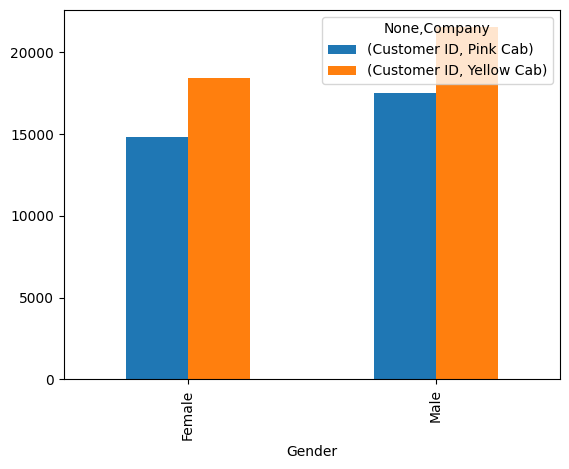

In [ ]:
plt.figure(figsize=(15,8))
df2 = pd.DataFrame(gender_uni)
df2.unstack(level=0).plot(kind='bar')
plt.plot();

###### **Conclusion**: Most of the users using the cab services are male but the difference in usage of the servies is minimal.

In [ ]:
# how the cab companies are faring over the years
year_vs_cab = df.groupby(['year', 'Company'])['City'].count()

<Figure size 1500x800 with 0 Axes>

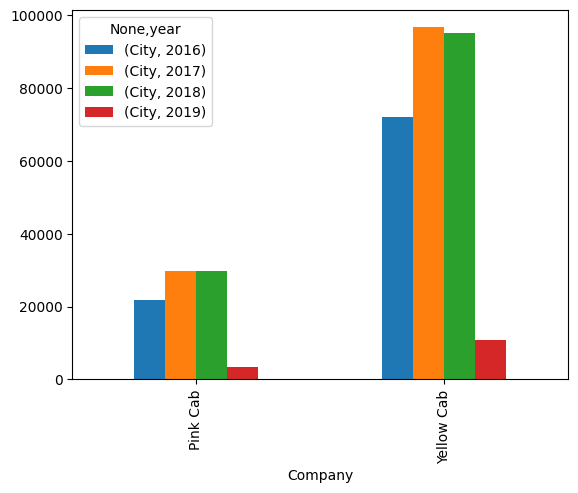

In [ ]:
plt.figure(figsize=(15,8))
df2 = pd.DataFrame(year_vs_cab)
df2.unstack(level=0).plot(kind='bar');

###### **Conclusion**: Number of users using the cab service increased over the years 

In [ ]:
df['month'] = df['Date of Travel'].dt.month

<Figure size 1500x800 with 0 Axes>

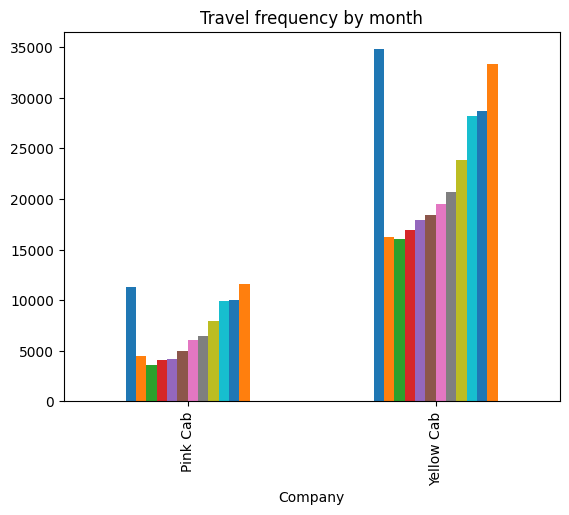

In [ ]:
# travel frequency by month
months_vs_cab = df.groupby(['month', 'Company'])['City'].count()
plt.figure(figsize=(15,8))
df3 = pd.DataFrame(months_vs_cab)
df3.unstack(level=0).plot(kind='bar', legend=False)
plt.title("Travel frequency by month")
plt.show();

###### **Conclusion**: Most of the traffic for both the cab companies is during Fall.

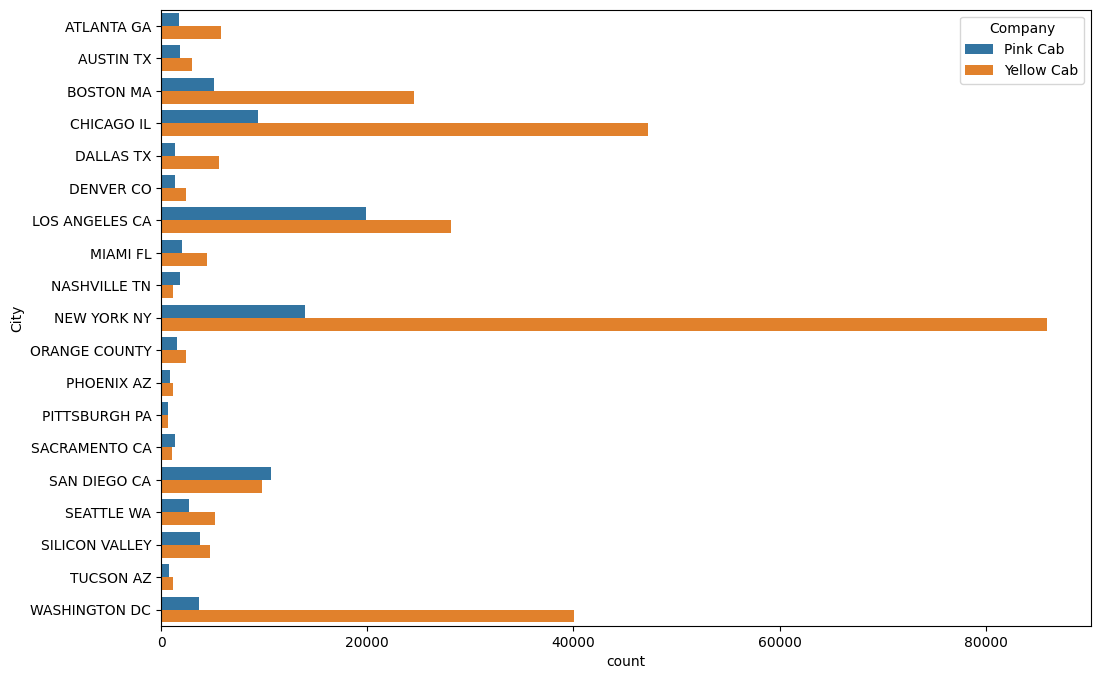

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(y='City', hue='Company', data=df)
plt.show()

###### **Conclusion**: Most of the user base is surrounded in New York, Chicago, Los Angeles and WAshington and most of these continuous customers use yellow cab as their mode of transport.

In [ ]:
# profit per year
sns.lineplot(x='year', y='Profit', hue="Company", data=df)
plt.xlabel("Year")
plt.ylabel("Profit %")
plt.title("Profit % per year")
plt.show()

[]

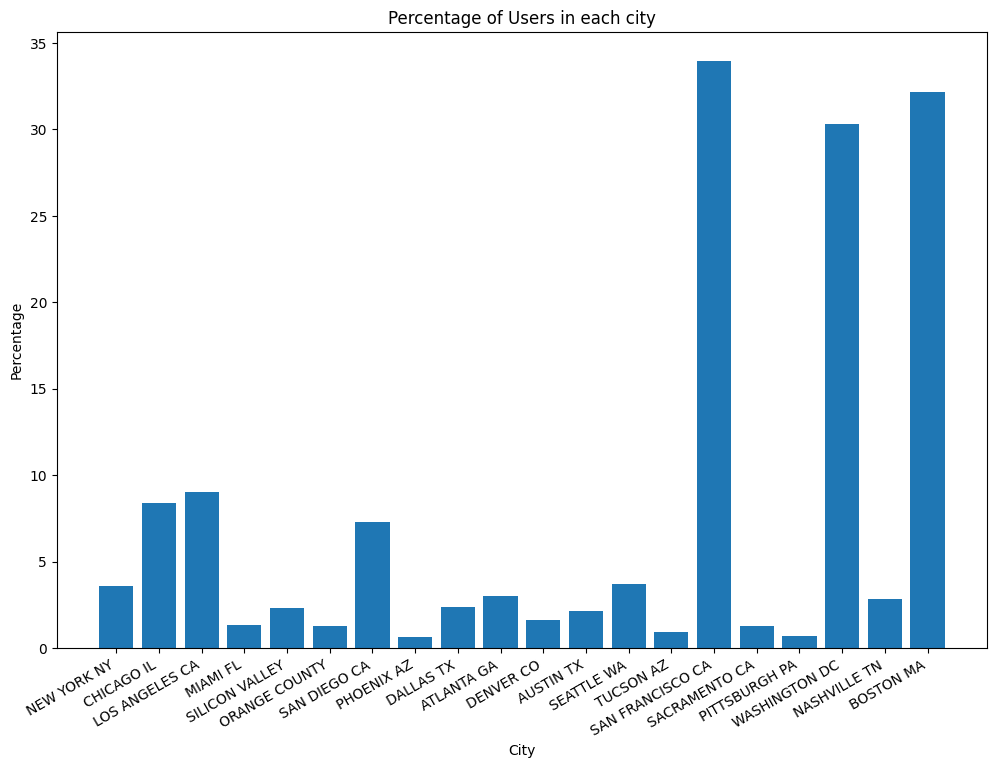

In [ ]:
# users percentage in each city
user_percent = (city['Users'] / city['Population']) * 100
cityy = city['City']

plt.figure(figsize=(12, 8))
plt.bar(cityy, user_percent)
plt.xticks(rotation=30, ha='right')
plt.title("Percentage of Users in each city")
plt.xlabel("City")
plt.ylabel("Percentage")
plt.plot()

###### **Conclusion**: Most of the users are also from the same cities that has a high percentage of cab company user base.

### **Summary**
#####We have analyzed all the four datasets and found that the yellow cab service has more profits, more user base, more users availing its service over last 3 years. Therefore, the recommendation is to invest in this company.